## Gaia Data Demonstration
This notebook demonstrates clustering of real Gaia data subset.

Standard Deviation of Tangential Velocity: 22.78 km/s


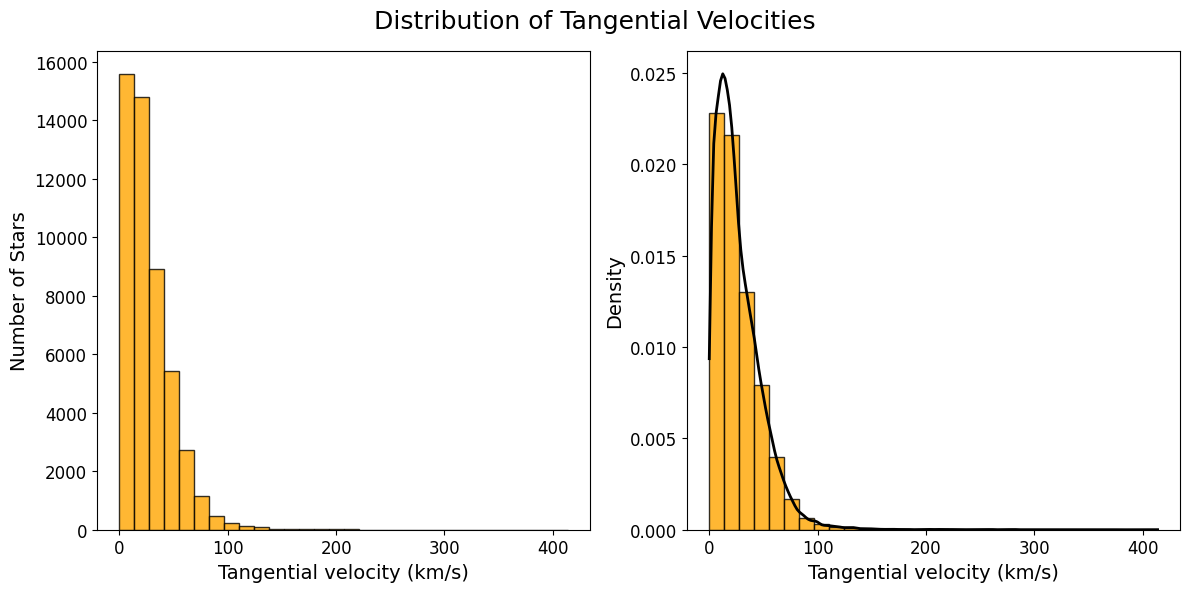


Running DBSCAN using Obs, eps=5, min_samples=5
ARI: 0.165
AMI: 0.095
Noise Fraction: 4.0%
Time: 0.39s

Running DBSCAN using d_u (sr=20, st=10, beta=0.1), eps=5, min_samples=5
ARI: 0.130
AMI: 0.070
Noise Fraction: 6.6%
Time: 15.32s


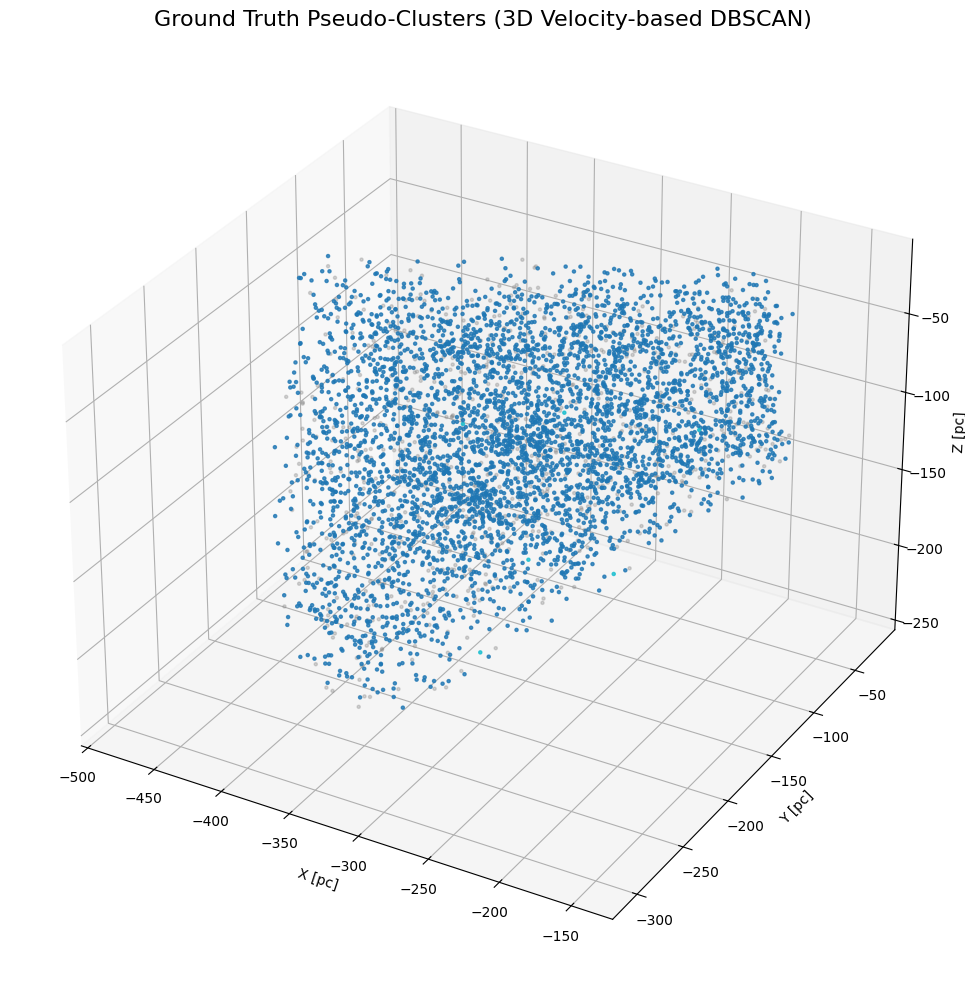

In [1]:
import sys
from pathlib import Path

project_root = Path("..").resolve()
if str(project_root) not in sys.path:
    sys.path.insert(0, str(project_root))
    
from plots.tangential import plot_tangential_velocity_distribution
from core.clustering import evaluate_with_pseudo_labels
from plots.pseudo_gt_clusters import plot_gt_clusters
import pandas as pd
import numpy as np

gaia_df = pd.read_csv("../data/data_orion_focus.csv")
gaia_df = gaia_df[
    gaia_df['radial_velocity'].notna() & np.isfinite(gaia_df['radial_velocity'])
]

plot_tangential_velocity_distribution(gaia_df)
gaia_df.head()

df_sample = gaia_df.sample(n=5000).reset_index(drop=True)
results = evaluate_with_pseudo_labels(df_sample, eps_test=5, min_samples=5, verbose=True, sigma_r_values=[20], sigma_t_values=[10])
plot_gt_clusters(df_sample, results["GT_DBSCAN"]["labels"])
